# COGS 108 - Final Project 

# How High Is the U.S.?

# Overview

As marijuana becomes legalized and viewed as a norm in U.S. culture, we want to explore marijuana usage as it relates to people's living conditions. In exploring the relationship between marijuana usage and important factors like age, education levels, and socioeconomic status, we can gain a better understanding of who is prone or susceptible to using based on their living conditions as it could affect their overall living experiences.

# Names

- Gregory Thein
- Queen Tran
- Shiva Upadhye
- Diana Thai
- Osvaldo Vazquez
- Sophie Concordel 

# Group Members IDs

- Gregory - A14369060
- Queen - FILL
- Shiva - A15693318
- Diana - A12855877
- Osvaldo - A14418440
- Sophie - FILL

# Research Question

We want to explore how various living conditions throughout the country is related to marijuana usage, making us prompt the question: 

“What is the relationship between marijuana usage, age, and socioeconomic status throughout the United States?”


## Background and Prior Work

*Fill in your background and prior work here* 

References (include links):
- 1)
- 2)

# Hypothesis


We believe that there would be three groups that would have increased marijuana usage from the various factors that we decide to study on. 

First, younger people (anyone younger than 26) will have a higher rate of marijuana usage because of the social popularity and culture behind this drug amongst the youth. 

Second, we predict that as the income and education level increase (higher socioeconomic status), there should be a negative relationship with drug use, meaning that the higher the income and education level, the lower the marijuana use. 

Finally, we also believe that there could be a high usage of medical marijuana in elderly and sick people as the popularity of medical marijuana increases throughout the country. 

# Dataset(s)

We decided to use two datasets for our analysis. After searching long and hard, we found the treasure that is the NHANES (National Health and Nutrition Examination Survey) had a lot of data, allowing us to collect a lot of information for a lot of people. There were multiple datasets from this page, organized by year and categories. We decided to use the 2015-2016 dataset since it was the most relevant completed dataset that was publically available. We decided to utilize the Demographics dataset since it contained most of our information about age and socioeconomic status and the Drug Usage dataset that allowed us to see the marijuana usage for the data. 


***TO DO***
- Dataset Name:
- Link to the dataset:
- Number of observations:

- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

# Setup

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os
import patsy
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

# set defaults
plt.style.use('seaborn-white')   # seaborn custom plot style
plt.rc('figure', dpi=100, figsize=(7, 5))   # set default size/resolution
plt.rc('font', size=12)   # font size

# Data Cleaning

Describe your data cleaning steps here.

In [6]:
demographics = pd.read_sas('data/DEMO_I.XPT')
demographics.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,5.0,1.0,3.0,134671.370419,135629.507405,1.0,125.0,10.0,10.0,4.39
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,3.0,3.0,NaN,24328.560239,25282.425927,1.0,125.0,4.0,4.0,1.32
2,83734.0,9.0,2.0,1.0,78.0,NaN,3.0,3.0,2.0,NaN,...,3.0,1.0,3.0,12400.008522,12575.838818,1.0,131.0,5.0,5.0,1.51
3,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,5.0,6.0,NaN,102717.995647,102078.634508,1.0,131.0,10.0,10.0,5.00
4,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,4.0,3.0,NaN,17627.674984,18234.736219,2.0,126.0,7.0,7.0,1.23


In [7]:
questionaire = pd.read_sas('data/DUQ_I.XPT')
questionaire.head()

,SEQN,DUQ200,DUQ210,DUQ211,DUQ213,DUQ215Q,DUQ215U,DUQ217,DUQ219,DUQ220Q,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,1.0,25.0,1.0,25.0,5.397605e-79,1.0,5.0,4.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,1.0,15.0,1.0,16.0,1.000000e+00,4.0,4.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [8]:
merged = pd.merge(demographics, questionaire, on = 'SEQN')
merged.head()

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,DUQ380B,DUQ380C,DUQ380D,DUQ380E,DUQ390,DUQ400Q,DUQ400U,DUQ410,DUQ420,DUQ430
0,83732.0,9.0,2.0,1.0,62.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83733.0,9.0,2.0,1.0,53.0,NaN,3.0,3.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,83735.0,9.0,2.0,2.0,56.0,NaN,3.0,3.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,83736.0,9.0,2.0,2.0,42.0,NaN,4.0,4.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,83741.0,9.0,2.0,1.0,22.0,NaN,4.0,4.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
cols = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDEDUC3', 'DMDEDUC2', 'DMDMARTL', 'RIDEXPRG', 'INDHHIN2', 
        'INDFMPIR', 'DMDHHSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DUQ200', 'DUQ210', 'DUQ217', 'DUQ211', 
        'DUQ213', 'DUQ215Q', 'DUQ219', 'DUQ220Q', 'DUQ230']
df = merged[cols]
df['CHILDREN_NUM'] = df['DMDHHSZA'] + df['DMDHHSZB']
df = df.drop(columns = ['DMDHHSZA', 'DMDHHSZB'])

In [10]:
lst_7 = ['DMDEDUC2', 'DUQ200', 'DUQ217', 'DUQ211', 'DUQ219']
lst_77 = ['DMDMARTL', 'DMDEDUC3', 'INDHHIN2']
lst_777 = ['DUQ210', 'DUQ213', 'DUQ230']

for i in lst_7:
    df[i] = df[i].replace({7: 7777, 9: 9999})
for i in lst_77:
    df[i] = df[i].replace({77: 7777, 99: 9999})
for i in lst_777:
    df[i] = df[i].replace({777: 7777, 999: 9999})

In [11]:
translation_dict = {'SEQN': 'ID', 'RIAGENDR': 'GENDER', 'RIDAGEYR': 'AGE', 'DMDMARTL': 'MARRIAGE', 
                    'RIDEXPRG': 'PREGNANCY', 'INDHHIN2': 'INCOME', 'INDFMPIR': 'INCOME_RATIO', 
                    'DMDHHSIZ': 'HOUSEHOLD_NUM', 'DMDHHSZE': 'OVER_60_NUM', 'DUQ200': 'EVER_USE', 
                    'DUQ210': 'FIRST_USAGE', 'DUQ217': 'FREQUENCY', 'DUQ211': 'PER_MONTH', 
                    'DUQ213': 'AGE_REGULAR_USE', 'DUQ215Q': 'LAST_ONCE_MONTH', 'DUQ219': 'AMOUNT', 'DUQ220Q': 'LAST_USAGE', 
                    'DUQ230': 'PAST_MONTH_USAGE', 'DMDEDUC2': 'EDUCATION_ADULT', 'DMDEDUC3': 'EDUCATION_KID'}
df = df.rename(index = str, columns = translation_dict)
df.head(10)

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,5.397605e-79,4.0,1.0,30.0,2.000000e+00
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.000000e+00,2.0,1.0,25.0,1.079521e-78
5,83742.0,2.0,32.0,NaN,4.0,1.0,2.0,6.0,1.03,4.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,13.0,NaN,2.000000e+00
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
7,83744.0,1.0,56.0,NaN,3.0,3.0,NaN,3.0,1.19,1.0,...,1.0,18.0,NaN,2.0,NaN,NaN,NaN,20.0,NaN,1.079521e-78
8,83747.0,1.0,46.0,NaN,5.0,6.0,NaN,3.0,0.75,2.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079521e-78
9,83750.0,1.0,45.0,NaN,2.0,5.0,NaN,10.0,1.36,5.0,...,1.0,21.0,NaN,2.0,NaN,NaN,NaN,20.0,1.0,2.000000e+00


In [12]:
#OVER_60_NUM
#LAST_ONCE_MONTH
#CHILDREN_NUM
df['OVER_60_NUM'] = df['OVER_60_NUM'].round(0)
df['LAST_ONCE_MONTH'] = df['LAST_ONCE_MONTH'].round(0)
df['CHILDREN_NUM'] = df['CHILDREN_NUM'].round(0)
df['INCOME_RATIO'] = df['INCOME_RATIO'].replace({5.397605e-79: 0}).round(2)

In [13]:
df.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
0,83732.0,1.0,62.0,NaN,5.0,1.0,NaN,10.0,4.39,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,83733.0,1.0,53.0,NaN,3.0,3.0,NaN,4.0,1.32,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,83735.0,2.0,56.0,NaN,5.0,6.0,NaN,10.0,5.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,83736.0,2.0,42.0,NaN,4.0,3.0,1.0,7.0,1.23,5.0,...,1.0,25.0,5.0,1.0,25.0,0.0,4.0,1.0,30.0,2.0
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0


In [14]:
#write dataframe to csv file
df.to_csv("cleaned_marijuana_data.csv")

# Data Analysis and Results

In [15]:
## TABLE DESCRIBING COLUMNS (TBD: Osvaldo)

In [16]:
df.describe(include='all')

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
count,4843.000000,4843.000000,4843.000000,261.000000,4582.000000,4582.000000,1240.000000,4675.000000,4377.000000,4843.000000,...,3428.000000,1715.000000,870.000000,1715.000000,870.000000,864.000000,870.000000,1.713000e+03,546.000000,4843.000000
mean,88672.875077,1.522816,42.860211,13.639847,3.492580,6.130292,1.979839,300.427166,2.425833,3.517654,...,17.052800,17.289796,33.031034,6.026239,18.013793,26.756944,22.404598,3.572796e+01,49.080586,1.062358
std,2873.134105,0.499531,15.046097,6.711685,1.277588,162.416967,0.303990,1582.121412,1.616415,1.698411,...,374.406203,4.558000,503.162908,187.757903,5.129602,373.884673,429.130785,4.710994e+02,603.969539,1.332804
min,83732.000000,1.000000,18.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,6.000000,1.000000,1.000000,6.000000,0.000000,1.000000,5.397605e-79,1.000000,0.000000
25%,86174.000000,1.000000,30.000000,12.000000,3.000000,1.000000,2.000000,6.000000,1.050000,2.000000,...,1.000000,15.000000,3.000000,1.000000,15.000000,1.000000,1.000000,2.000000e+00,2.000000,0.000000
50%,88677.000000,2.000000,43.000000,13.000000,4.000000,1.000000,2.000000,8.000000,2.040000,3.000000,...,1.000000,17.000000,4.000000,1.000000,17.000000,3.000000,2.000000,5.000000e+00,6.000000,1.000000
75%,91164.000000,2.000000,56.000000,14.000000,5.000000,5.000000,2.000000,14.000000,3.790000,5.000000,...,2.000000,19.000000,5.000000,2.000000,20.000000,12.000000,3.000000,1.500000e+01,25.000000,2.000000
max,93702.000000,2.000000,69.000000,66.000000,5.000000,7777.000000,3.000000,9999.000000,5.000000,7.000000,...,9999.000000,50.000000,9999.000000,7777.000000,50.000000,7777.000000,9999.000000,9.999000e+03,9999.000000,7.000000


In [17]:
# Basic questions about the dataset

# 1. The number of entries in the dataset
print(df.shape)
# We have 4843 rows and 21 columns 

# 2. Total number of areas that contribute to marijuana usage and their unique values of the columns 
print("*****************")
print(df.nunique())

# Confirm the number of missing values in each column.
print("*****************")
print(df.isnull().sum())

(4843, 21)
*****************
ID                  4843
GENDER                 2
AGE                   52
EDUCATION_KID          8
EDUCATION_ADULT        5
MARRIAGE               7
PREGNANCY              3
INCOME                16
INCOME_RATIO         427
HOUSEHOLD_NUM          7
OVER_60_NUM            4
EVER_USE               4
FIRST_USAGE           38
FREQUENCY              7
PER_MONTH              3
AGE_REGULAR_USE       38
LAST_ONCE_MONTH       45
AMOUNT                 6
LAST_USAGE            51
PAST_MONTH_USAGE      30
CHILDREN_NUM           8
dtype: int64
*****************
ID                     0
GENDER                 0
AGE                    0
EDUCATION_KID       4582
EDUCATION_ADULT      261
MARRIAGE             261
PREGNANCY           3603
INCOME               168
INCOME_RATIO         466
HOUSEHOLD_NUM          0
OVER_60_NUM            0
EVER_USE            1415
FIRST_USAGE         3128
FREQUENCY           3973
PER_MONTH           3128
AGE_REGULAR_USE     3973
LAST_ONCE_MONTH

## Visualizing the Demographics (DEMO) data

Since our research attempts to explore the relationship between socioeconomic status and marijuana consumption, we will be focusing on the following variables as measures of an individual's socioeconomic status: <br>
1. Annual Household Income <br>
2. Ratio of Family Income to Poverty <br>
3. Education level - Adults 20+ <br>
4. Education level - Children/Youth 6-19

Since the coding scheme in the datasets uses numerical values for categorizing response, we will first convert them into verbal labels for better interpretation.

In [18]:
# Creating labels for interpreting visualizations
income_labels = ['0-4.9', '5-9.9', '10-14.9','15-19.9', '20-24.9', '25-34.9', '35-44.9', '45-54.9','55-64.9','65-74.9','75-99', '100+']
education_kid_labels = ['9th grade','10th grade','11th grade','12th grade, no diploma','High school graduate','GED or equivalent','More than high school','Less than 9th grade']
education_adult_labels = ['less than 9th grade', '9-11th grade', 'high school graduate / GED', 'AA degree', 'college graduate']
amount_labels = ['1/day', '2/day', '3-5/day', '>6/day']
frequency_labels = ['once', '2-3 times', '4-8 times', '9-24 times', '25-30 times']

### INCOME: Annual Household Income

In [19]:
# remove unknown, missing, and cummulative values (12 for < $20,000 and 13 for > $20,000)
df.drop(df[(df['INCOME']==7777) | (df['INCOME']==9999) | (df['INCOME']==12) | (df['INCOME']==13)].index, inplace=True)

Text(0.5,1,'Distribution of household income')

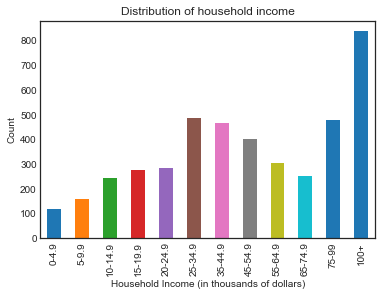

In [20]:
df['INCOME'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(12),income_labels)
plt.xlabel("Household Income (in thousands of dollars)")
plt.ylabel("Count")
plt.title("Distribution of household income")

The above visualization provides an important insight into the distribution of income in this dataset: a majority of the individuals surveyed belong to the 100k+ income bracket.

### INCOME_RATIO: Ratio of family income to poverty

The poverty threshold is calculated according to the Department of Health and Human Services and adjusted to account for differences that arise from geographical location and family / household sizes. 

The ratio of family income to poverty is thus defined as: <br>

$$\text{Ratio of family income to poverty} = \frac{\text{family income}}{\text{poverty threshold}}$$

The values in INCOME_RATIO range from $0$ to $4.99$ with all values $\ge 5$ denoted by $5$. For instance, an income to poverty ratio value of $0.5$ indicates that the income is $0.5$ times or $50$% below the poverty threshold, an income to poverty ratio of $1$ indicates that income is equal to poverty threshold, and an income to poverty ratio of $5$ indicates that the income is $5$ times the poverty threshold.

Text(0,0.5,'Count')

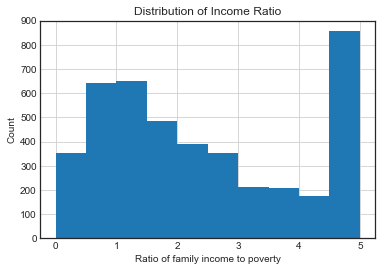

In [21]:
df['INCOME_RATIO'].hist()
plt.title("Distribution of Income Ratio")
plt.xlabel("Ratio of family income to poverty")
plt.ylabel("Count")

In [22]:
df[['INCOME','INCOME_RATIO']].corr()

,INCOME,INCOME_RATIO
INCOME,1.000000,0.876722
INCOME_RATIO,0.876722,1.000000


We see that INCOME and INCOME_RATIO are strongly correlated with an $r^{2}$ value of 0.877, making INCOME_RATIO, a continous variable, a good proxy for INCOME

### EDUCATION_ADULT

In [23]:
df_adult = df[df.AGE >= 20]
df_adult.shape

(4235, 21)

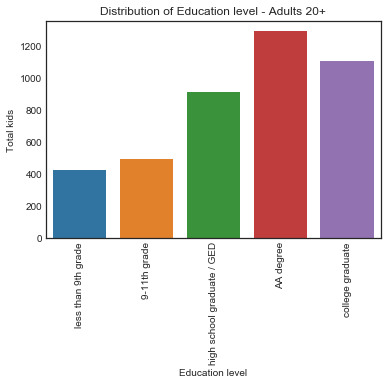

In [24]:
sns.countplot(x='EDUCATION_ADULT', data=df_adult)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Distribution of Education level - Adults 20+')
ax.set_ylabel('Total kids')
ax.set_xlabel('Education level')
ax.set_xticklabels(education_adult_labels,rotation='vertical');

In [25]:
df_adult['EDUCATION_ADULT'].value_counts().sort_index()

1.0     424
2.0     496
3.0     915
4.0    1294
5.0    1106
Name: EDUCATION_ADULT, dtype: int64

We see that about $56$% of the individuals in the dataset had some college degree. This breaks down into $30.5$% of AA degree holders and $25.5$% of college graduates.

### EDUCATION_KID

In [26]:
df_kid = df[df.AGE < 20]
df_kid.shape

(244, 21)

In [27]:
df_kid['AGE'].value_counts()

18.0    124
19.0    120
Name: AGE, dtype: int64

We see only two unique ages - 18 and 19 - appear in this subset of data.

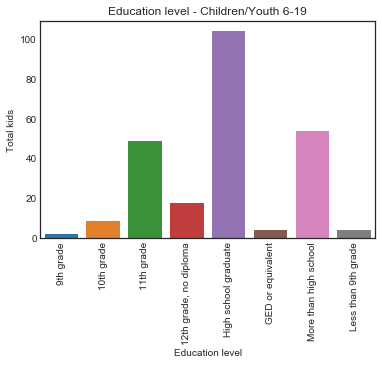

In [28]:
sns.countplot(x='EDUCATION_KID', data=df_kid)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Education level - Children/Youth 6-19')
ax.set_ylabel('Total kids')
ax.set_xlabel('Education level')
ax.set_xticklabels(education_kid_labels,rotation='vertical');

In [29]:
df_kid['EDUCATION_KID'].value_counts().sort_index()

9.0       2
10.0      9
11.0     49
12.0     18
13.0    104
14.0      4
15.0     54
66.0      4
Name: EDUCATION_KID, dtype: int64

We see that 42% of all children (aged 18 and 19) were high school graduates.

## ## Visualizing the Drug-Use (DUQ) data

To better understand marijuana usage, we will explore the following components that provide insight into consumption patterns: <br>

1. AGE_REGULAR_USE: Age started regularly using marijuana
2. AMOUNT: Number of joints/pipes per day
3. FREQUENCY: Number of times / month

### AGE_REGULAR_USE: Age started regularly using marijuana

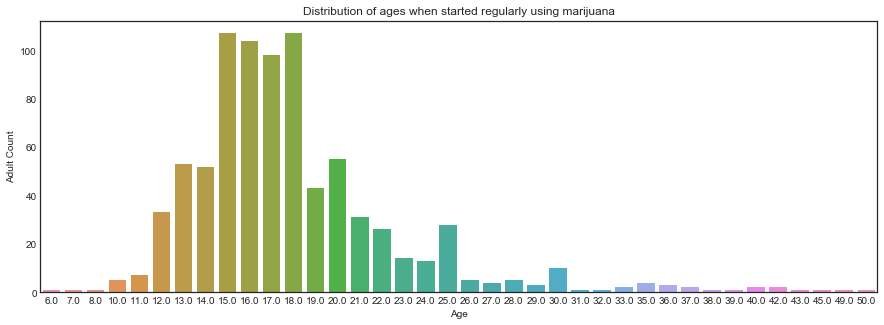

In [30]:
sns.countplot(x='AGE_REGULAR_USE', data=df)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Distribution of ages when started regularly using marijuana')
ax.set_ylabel('Adult Count')
ax.set_xlabel('Age')

fig = plt.gcf()
fig.set_size_inches(15,5)


This graph shows how the age participants begin to used regularly sits around 15-19 years old. 

### AMOUNT: Number of joints / pipes per day

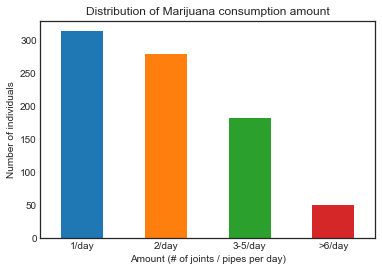

In [31]:
# remove unknown, missing, and cummulative values
df.drop(df[(df['AMOUNT']==7777) | (df['AMOUNT']==9999)].index, inplace=True)
df['AMOUNT'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(4),amount_labels, rotation='horizontal')
plt.xlabel("Amount (# of joints / pipes per day)")
plt.ylabel("Number of individuals")
plt.title("Distribution of Marijuana consumption amount")
plt.show()


### FREQUENCY:  Number of times marijuana  is consumption / month

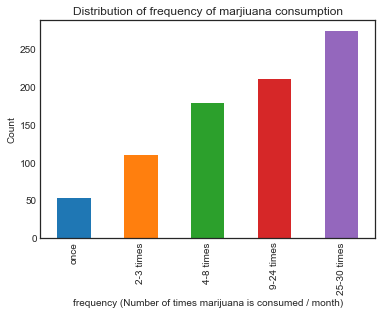

In [32]:
df.drop(df[(df['FREQUENCY']==7777) | (df['FREQUENCY']==9999)].index, inplace=True)
df['FREQUENCY'].value_counts().sort_index().plot(kind='bar')
plt.xticks(np.arange(5),frequency_labels, rotation='vertical')
plt.xlabel("frequency (Number of times marijuana is consumed / month)")
plt.ylabel("Count")
plt.title("Distribution of frequency of marjiuana consumption")
plt.show()

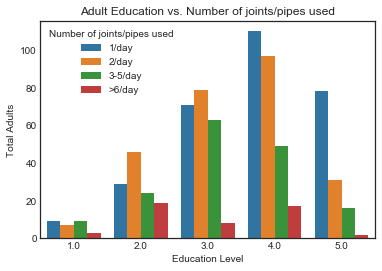

In [33]:
df_adult = df[df.AGE > 19]
sns.countplot(x='EDUCATION_ADULT', hue = 'AMOUNT', 
              data=df_adult)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Adult Education vs. Number of joints/pipes used')
ax.set_ylabel('Total Adults')
ax.set_xlabel('Education Level')
ax.legend(amount_labels, title='Number of joints/pipes used', loc='best')

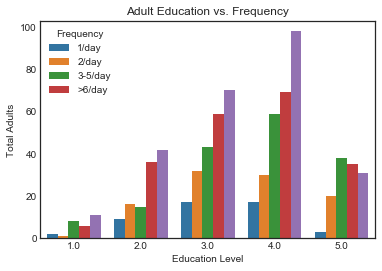

In [34]:
sns.countplot(x='EDUCATION_ADULT', hue = 'FREQUENCY', 
              data=df_adult)
ax = plt.gca()

# add title and axis labels (modify x-axis label)
ax.set_title('Adult Education vs. Frequency')
ax.set_ylabel('Total Adults')
ax.set_xlabel('Education Level')
ax.legend(amount_labels, title='Frequency', loc='best')

## Digging Deeper

### Subsetting data

Since we hypothesize that younger people (defined here as below the age of 26) would exhibit higher consumption of marijuana, we will now analyze this subset of data.

In [29]:
min_age = df['AGE'].min()
max_age = df['AGE'].max()
min_age, max_age

(18.0, 69.0)

In [30]:
under_26 = df[df['AGE'] <= 26]
under_26.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
4,83741.0,1.0,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0
6,83743.0,1.0,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,83759.0,2.0,19.0,15.0,NaN,NaN,NaN,7.0,1.74,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,83761.0,2.0,24.0,NaN,5.0,5.0,2.0,1.0,0.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23,83784.0,1.0,22.0,NaN,4.0,5.0,NaN,NaN,NaN,4.0,...,1.0,12.0,5.0,1.0,13.0,0.0,4.0,1.0,27.0,0.0


We will also standardize the gender labels to help tease out differences in gender.

In [31]:
#functions for converting from numerical to categorical data
def num_to_category(num_val, data_dict):
    if num_val in data_dict.keys():
        return data_dict[num_val]
    else:
        return np.nan
    
# GENDER
df['GENDER']
gender_dict = {1:'MALE',2:'FEMALE'}
df['GENDER']=df['GENDER'].apply(num_to_category, data_dict=gender_dict)
under_26['GENDER']=under_26['GENDER'].apply(num_to_category, data_dict=gender_dict)
under_26.head()

,ID,GENDER,AGE,EDUCATION_KID,EDUCATION_ADULT,MARRIAGE,PREGNANCY,INCOME,INCOME_RATIO,HOUSEHOLD_NUM,...,EVER_USE,FIRST_USAGE,FREQUENCY,PER_MONTH,AGE_REGULAR_USE,LAST_ONCE_MONTH,AMOUNT,LAST_USAGE,PAST_MONTH_USAGE,CHILDREN_NUM
4,83741.0,MALE,22.0,NaN,4.0,5.0,NaN,7.0,2.08,3.0,...,1.0,15.0,4.0,1.0,16.0,1.0,2.0,1.0,25.0,0.0
6,83743.0,MALE,18.0,11.0,NaN,NaN,NaN,15.0,5.00,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
14,83759.0,FEMALE,19.0,15.0,NaN,NaN,NaN,7.0,1.74,3.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
15,83761.0,FEMALE,24.0,NaN,5.0,5.0,2.0,1.0,0.00,1.0,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
23,83784.0,MALE,22.0,NaN,4.0,5.0,NaN,NaN,NaN,4.0,...,1.0,12.0,5.0,1.0,13.0,0.0,4.0,1.0,27.0,0.0


###  Exploring relationships between indicators of socioeconomic status and marijuana consumption patterns

#### Adult eduation and Age of regular use

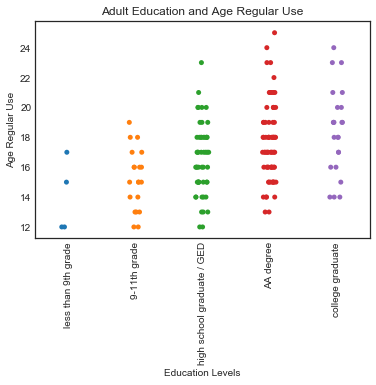

In [37]:
sns.stripplot(under_26['EDUCATION_ADULT'], under_26['AGE_REGULAR_USE'])
plt.xlabel('Education Levels')
plt.ylabel('Age Regular Use')
plt.xticks(np.arange(5), education_adult_labels, rotation='vertical')
plt.title('Adult Education and Age Regular Use')
plt.show()

The stripplot shows that different ages that participants began using marijuana regularly grouped with their education. This helps us visualize whether education plays a role in when they begin using regularly. The graph shows that the range of ages for college graduates and above seem to be a some years old later than the other groups. Running significance tests can confirm or reject this observation. 

In [33]:
nonull_edu = under_26.dropna(subset=['AGE_REGULAR_USE'], how='all')
lower = nonull_edu[nonull_edu['EDUCATION_ADULT'] == 1]['AGE_REGULAR_USE'].values
nodip = nonull_edu[nonull_edu['EDUCATION_ADULT'] == 2]['AGE_REGULAR_USE'].values
dip = nonull_edu[nonull_edu['EDUCATION_ADULT'] == 3]['AGE_REGULAR_USE'].values
aa = nonull_edu[nonull_edu['EDUCATION_ADULT'] == 4]['AGE_REGULAR_USE'].values
grad = nonull_edu[nonull_edu['EDUCATION_ADULT'] == 5]['AGE_REGULAR_USE'].values
#print(lower, nodip, dip, aa, grad)

We're extracting ages of regular use from each education level in order to run the ttests.

In [34]:
## TTEST: EDUCATION V. AGE_REGULAR_USE
[t, p] = ttest_ind(lower, grad)
print("lower to grad: ", t, p)

[t2, p2] = ttest_ind(nodip, grad)
print("nodip to grad: ", t2, p2)

[t3, p3] = ttest_ind(dip, grad)
print("dip to grad: ", t3, p3)

[t4, p4] = ttest_ind(aa, grad)
print("aa to grad: ", t4, p4)

lower to grad:  -2.911411371722019 0.007462575346296662
nodip to grad:  -4.2270763583195885 0.00012898466458450826
dip to grad:  -2.969447351964255 0.004050421325593811
aa to grad:  -1.2048497479580489 0.23141998522111082


Ttests to compare the values of participants' ages first regularly used to their education levels show us whether there is significant difference between what education level they have completed. 

With alpha = 0.01, the p-values show that there's significance difference on the age regularly used for having 9th-12th grade education with no diploma compared to a college gradudate or above. The p-values show that there's also significance difference on the age regularly used for being a HS graduate/having a GED or equivalent compared to a college gradudate or above. 

Based on the strip plot, there could be significant difference for college graduates and above to start using marijuana regularly much later in age compared to the other groups.

The other values show no significance difference.

#### Adult eduation and Amount consumed / day

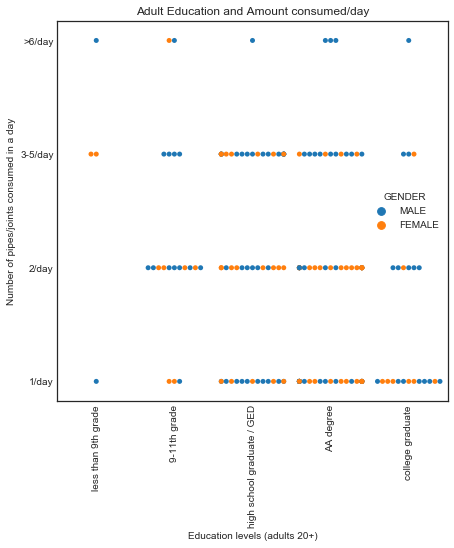

In [35]:
plt.figure(figsize=(7,7))
sns.swarmplot(under_26['EDUCATION_ADULT'], under_26['AMOUNT'], data=under_26, hue='GENDER')
plt.xlabel("Education levels (adults 20+)")
plt.ylabel("Number of pipes/joints consumed in a day")
plt.xticks(np.arange(5), education_adult_labels,rotation='vertical');
plt.yticks(np.arange(1, 5, step=1), amount_labels)
plt.title("Adult Education and Amount consumed/day")
plt.show()

#### Adult eduation and Frequency of consumption 

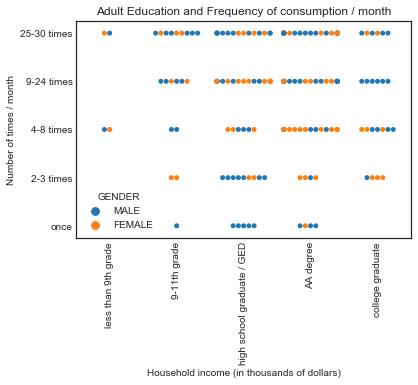

In [38]:
sns.swarmplot(x='EDUCATION_ADULT', y='FREQUENCY', data=under_26, hue='GENDER')
plt.xticks(np.arange(5), education_adult_labels,rotation='vertical');
plt.yticks(np.arange(1,6,step=1),frequency_labels, rotation='horizontal')
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Number of times / month")
plt.title("Adult Education and Frequency of consumption / month")
plt.show()

####  Income and Age of regular use

No handles with labels found to put in legend.


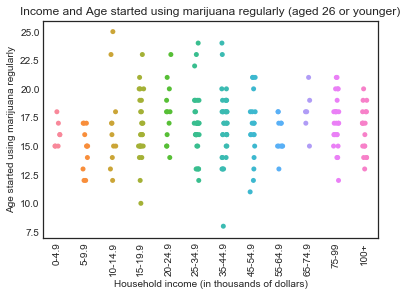

In [39]:
sns.stripplot(x='INCOME', y='AGE_REGULAR_USE', data=under_26)
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Age started using marijuana regularly")
plt.legend().set_visible(False)
plt.title("Income and Age started using marijuana regularly (aged 26 or younger)")
plt.xticks(np.arange(12),income_labels, rotation='vertical')
plt.show()

In [40]:
outcome, predictors = patsy.dmatrices('AGE_REGULAR_USE~INCOME', under_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        AGE_REGULAR_USE   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8696
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.352
Time:                        13:20:53   Log-Likelihood:                -506.83
No. Observations:                 212   AIC:                             1018.
Df Residuals:                     210   BIC:                             1024.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.4066      0.384     42.734      0.0

P-value 0.352 shows so far that AGE_REGULAR_USE and INCOME have no significance.

#### Income and Amount consumed / day

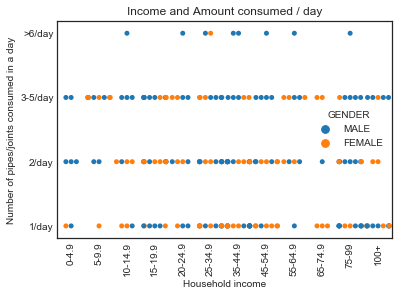

In [42]:
sns.swarmplot(under_26['INCOME'], under_26['AMOUNT'], data=under_26, hue='GENDER')
plt.xlabel("Household income")
plt.ylabel("Number of pipes/joints consumed in a day")
plt.xticks(np.arange(12), income_labels, rotation='vertical')
plt.yticks(np.arange(1, 5, step=1), amount_labels)
plt.title("Income and Amount consumed / day")
plt.show()

In [1]:
outcome, predictors = patsy.dmatrices('AMOUNT~INCOME', under_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

NameError: name 'patsy' is not defined

As we take a look at AMOUNT and INCOME, the p-value is smaller, sitting at 0.2 but still shows no significance. 

#### Income and Frequency of consumption / month

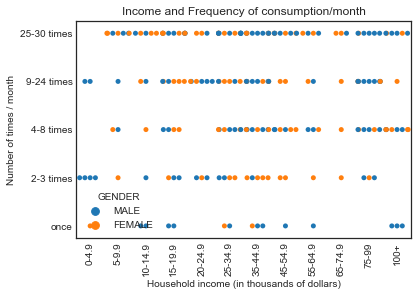

In [44]:
sns.swarmplot(x='INCOME', y='FREQUENCY', data=under_26, hue='GENDER')
plt.xticks(np.arange(12),income_labels, rotation='vertical')
plt.yticks(np.arange(1,6,step=1),frequency_labels, rotation='horizontal')
plt.xlabel("Household income (in thousands of dollars)")
plt.ylabel("Number of times / month")
plt.title("Income and Frequency of consumption/month")
plt.show()

In [45]:
outcome, predictors = patsy.dmatrices('FREQUENCY~INCOME', under_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.02552
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.873
Time:                        13:21:11   Log-Likelihood:                -351.97
No. Observations:                 212   AIC:                             707.9
Df Residuals:                     210   BIC:                             714.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6864      0.185     19.933      0.0

We will now perform a multivariate OLS regression to explore how marijuana consumption trends correlate with income and education levels

## How do income and education correlate with Marijuana consumption patterns?

### Multivariate Regression: Household income and adult education vs. age when started using regularly

In [46]:
outcome, predictors = patsy.dmatrices('AGE_REGULAR_USE~INCOME+EDUCATION_ADULT', under_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        AGE_REGULAR_USE   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     19.37
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           3.07e-08
Time:                        13:21:15   Log-Likelihood:                -364.00
No. Observations:                 159   AIC:                             734.0
Df Residuals:                     156   BIC:                             743.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.3346      0.753     

We decide to look into multiple variables that could affect usage, and found that AGE_REGULAR_USE, INCOME, and EDUCATION_ADULT reveals a p-value of 0.00, which shows significance.

We decide to look into multiple variables that could affect usage, and found that AGE_REGULAR_USE, INCOME, and EDUCATION_ADULT reveals a p-value of 0.00, which shows significance.

### Multivariate Regression: Household income and adult education vs. amount consumed per day

In [47]:
predictors = patsy.dmatrices('AMOUNT~INCOME+EDUCATION_ADULT', under_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 AMOUNT   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.109
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00279
Time:                        13:21:15   Log-Likelihood:                -201.06
No. Observations:                 159   AIC:                             408.1
Df Residuals:                     156   BIC:                             417.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.8890      0.270     

We also found that AMOUNT, INCOME, and EDUCATION_ADULT reveals a p-value of 0.04, which shows significance.

### Multivariate Regression: Household income and adult education vs. frequency of consumption

In [48]:
outcome, predictors = patsy.dmatrices('FREQUENCY~INCOME+EDUCATION_ADULT', under_26)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2935
Date:                Wed, 12 Jun 2019   Prob (F-statistic):              0.746
Time:                        13:21:15   Log-Likelihood:                -258.50
No. Observations:                 159   AIC:                             523.0
Df Residuals:                     156   BIC:                             532.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.9230      0.388     

## Digging Deeper: How do age and gender correlate with marijuana consumption?

### Multivariate Regression:  age and gender vs. age when started using regularly

In [49]:
outcome, predictors = patsy.dmatrices('AGE_REGULAR_USE~AGE+GENDER', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:        AGE_REGULAR_USE   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     29.26
Date:                Wed, 12 Jun 2019   Prob (F-statistic):           5.32e-13
Time:                        13:21:16   Log-Likelihood:                -2494.9
No. Observations:                 825   AIC:                             4996.
Df Residuals:                     822   BIC:                             5010.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         16.0272      0.565     28.

AGE_REGULAR_USE, AGE, and GENDER show a p-value of 0.00 which indicates significance.

### Multivariate Regression:  age and gender vs. amount consumed in a day

In [50]:
outcome, predictors = patsy.dmatrices('FREQUENCY~AGE+GENDER', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.444
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00167
Time:                        13:21:16   Log-Likelihood:                -1342.0
No. Observations:                 825   AIC:                             2690.
Df Residuals:                     822   BIC:                             2704.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8950      0.140     27.

FREQUENCY, AGE, and GENDER have a p-value of 0.004, which is significant.

### Multivariate Regression:  age and gender vs. frequency of consumption

In [51]:
outcome, predictors = patsy.dmatrices('FREQUENCY~AGE+GENDER', df)
mod = sm.OLS(outcome, predictors)
res = mod.fit() 
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              FREQUENCY   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.444
Date:                Wed, 12 Jun 2019   Prob (F-statistic):            0.00167
Time:                        13:21:17   Log-Likelihood:                -1342.0
No. Observations:                 825   AIC:                             2690.
Df Residuals:                     822   BIC:                             2704.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8950      0.140     27.

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*